Notebook to understand the non-white noise cleaning in PEBBLES.

In [1]:
import numpy as np
import pebbles
import healpy as hp
import matplotlib.pyplot as plt
plt.style.use('blt_paper')

In [2]:
peb = pebbles.Pebbles(**pebbles.configurations.run['sofidV3_ss0_ns4'], nmc=16)
mask = pebbles.pebbles.get_mask(peb.nside)
md = lambda m: np.ma.masked_array(mask=(np.ceil(mask)==0), data=m, fill_value=hp.UNSEEN)

Running PEBBLES with the parameters: 
	 Method: method 
	 Nside: 256  
	 Nside_spec: 4


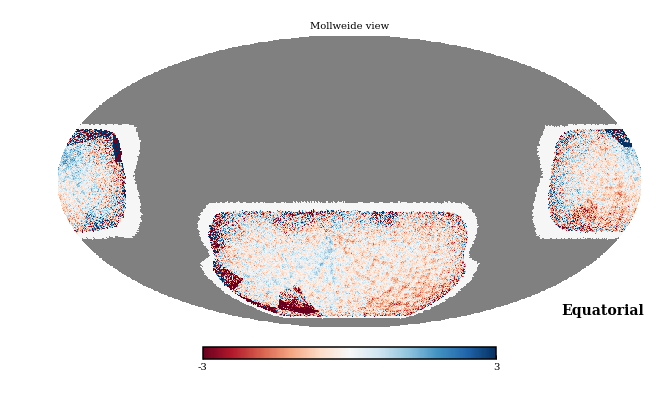

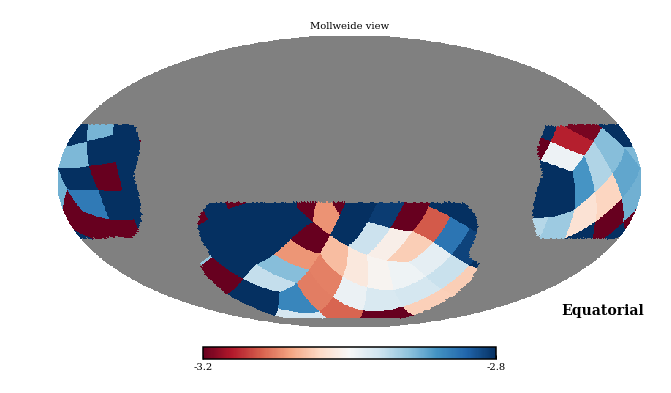

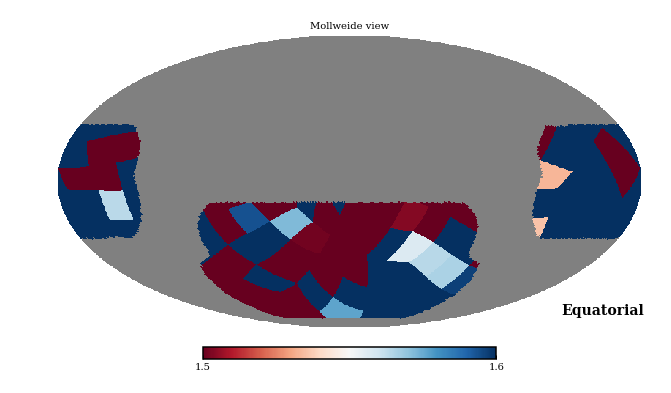

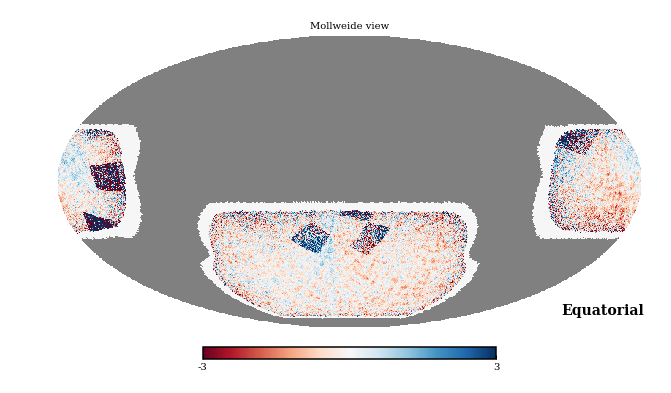

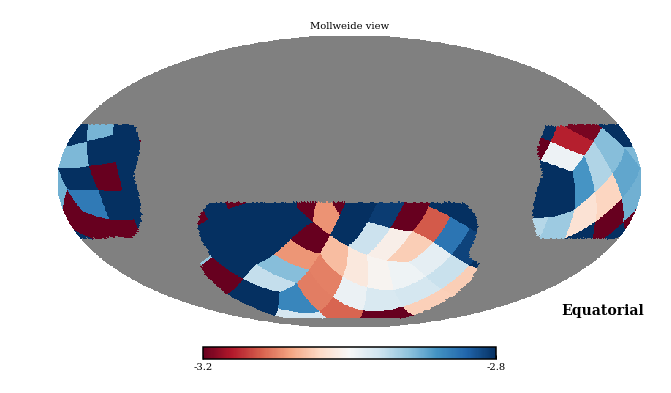

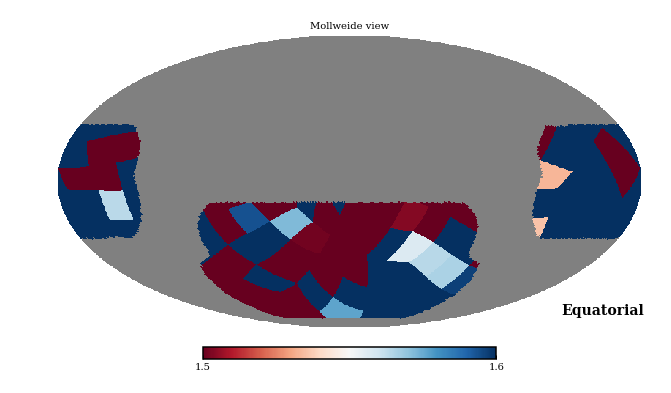

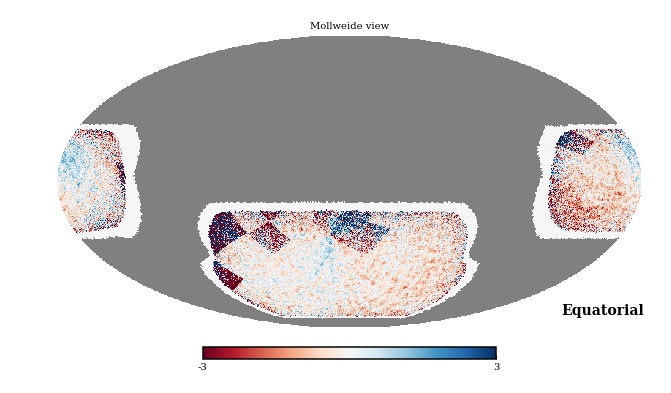

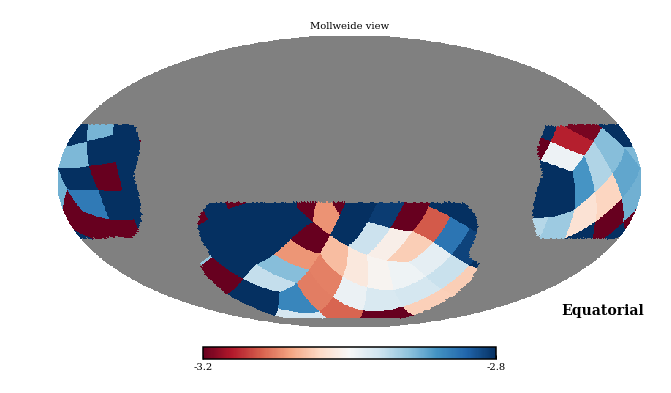

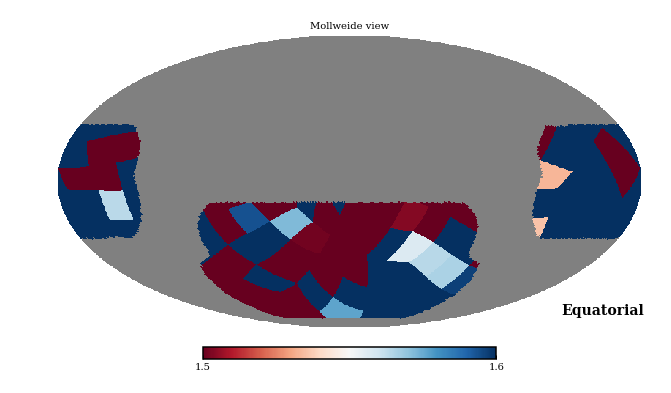

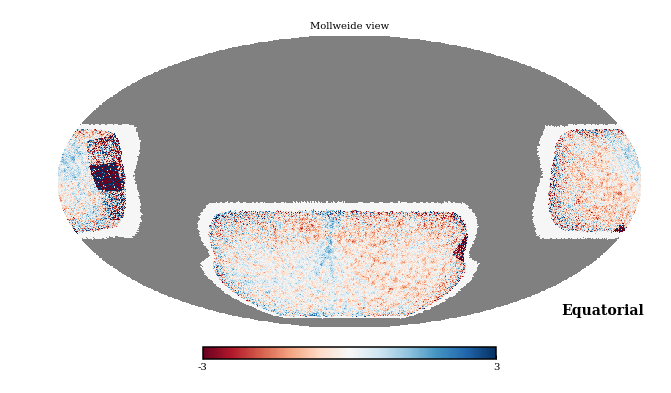

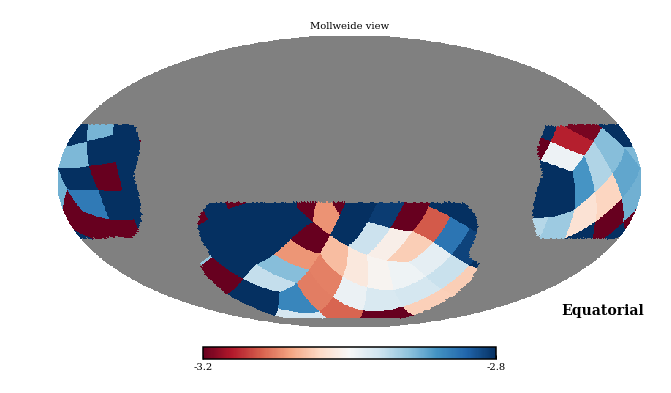

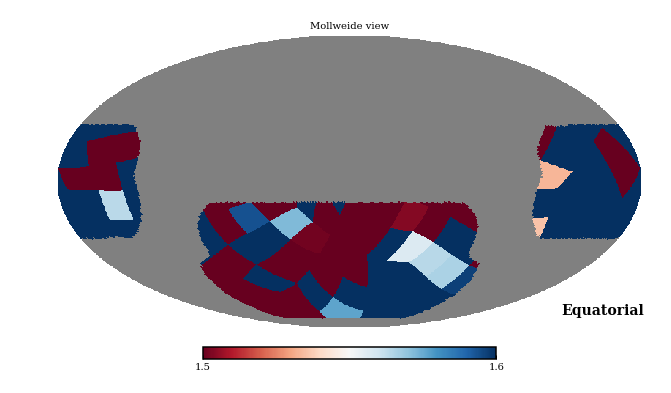

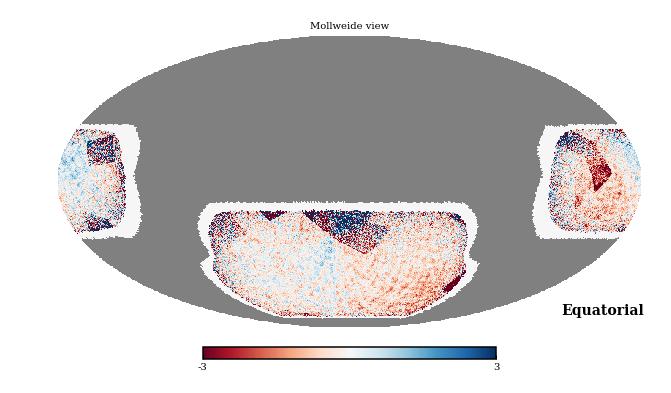

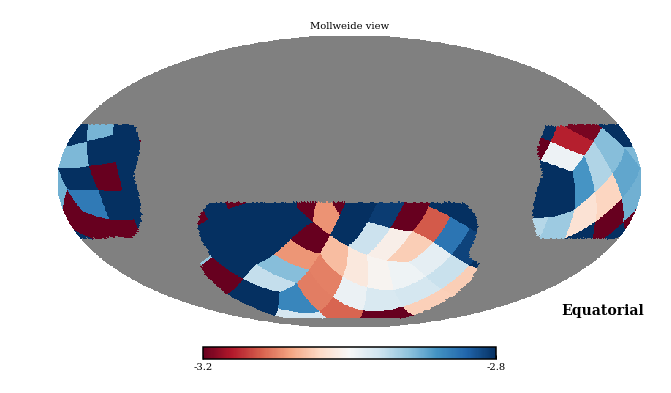

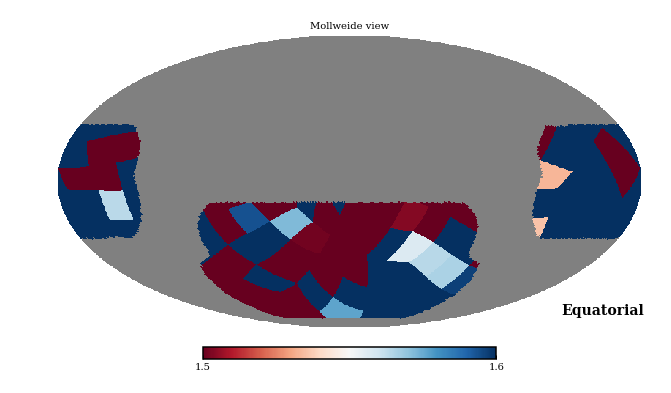

In [3]:
for i in [1, 2, 4, 10, 15]:
    amp = peb.load_cleaned_amp_maps('ml', 'cmb', 'q', i)
    beta_s = hp.ud_grade(peb.load_cleaned_spec_maps(0, 'ml'), nside_out=peb.nside)
    beta_d = hp.ud_grade(peb.load_cleaned_spec_maps(1, 'ml'), nside_out=peb.nside)
    T_d = hp.ud_grade(peb.load_cleaned_spec_maps(2, 'ml'), nside_out=peb.nside)
    hp.mollview(md(amp), coord=['G', 'C'], min=-3, max=3)
    hp.mollview(md(beta_s), coord=['G', 'C'], min=-3.2, max=-2.8)
    hp.mollview(md(beta_d), coord=['G', 'C'], min=1.5, max=1.6)
    #hp.mollview(md(T_d), coord=['G', 'C'])

In [4]:
data = peb.load_simulated_data()

Loading simulated data: 



In [5]:
mask = pebbles.pebbles.get_mask(peb.nside)
lim = np.zeros_like(mask)
lim[mask>0.02] = 1

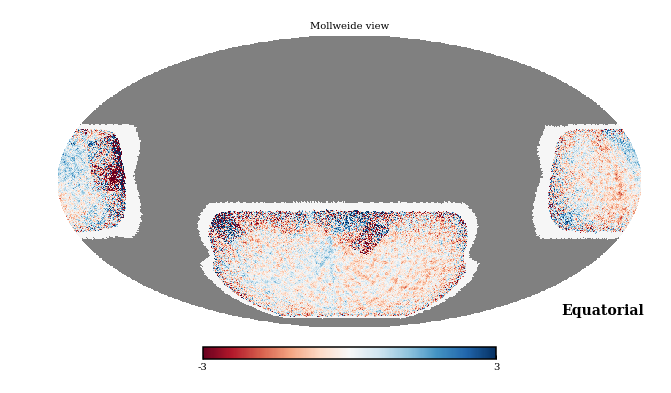

In [6]:
amp = peb.load_cleaned_amp_maps('ml', 'cmb', 'q', 0)
beta_s = hp.ud_grade(peb.load_cleaned_spec_maps(0, 'ml'), nside_out=peb.nside)
beta_d = hp.ud_grade(peb.load_cleaned_spec_maps(1, 'ml'), nside_out=peb.nside)
T_d = hp.ud_grade(peb.load_cleaned_spec_maps(2, 'ml'), nside_out=peb.nside)
hp.mollview(md(lim * amp), coord=['G', 'C'], min=-3, max=3)

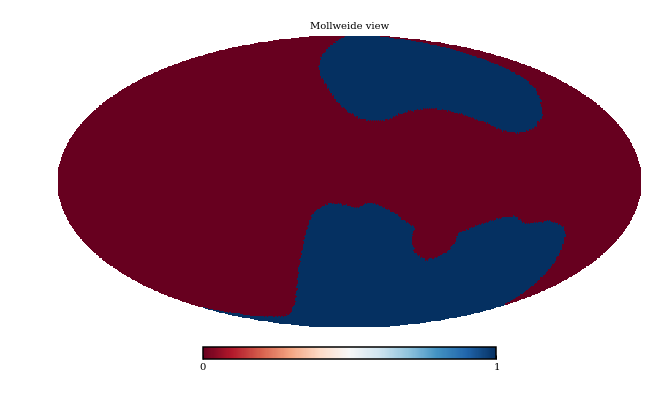

In [7]:
hp.mollview(lim)